<a href="https://colab.research.google.com/github/Sifatkhan-1915020/deeplearning-/blob/main/multilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train

In [11]:
#normalizing
x_train /= 255
x_test /=255

In [ ]:
x_train

In [13]:
print("Feature matrix",x_train.shape)
print("Target matrix",x_test.shape)
print("Feature matrix",y_train.shape)
print("Target matrix",y_test.shape)

Feature matrix (60000, 28, 28)
Target matrix (10000, 28, 28)
Feature matrix (60000,)
Target matrix (10000,)


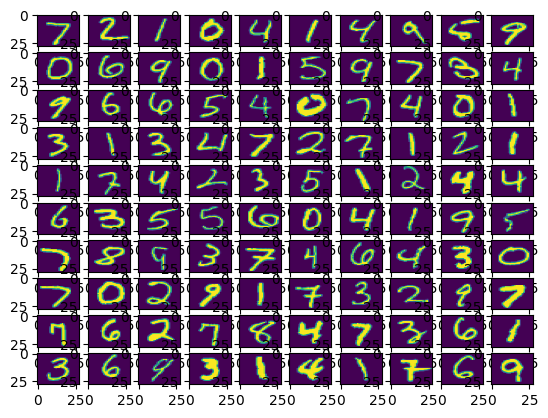

In [16]:
fig,ax =plt.subplots(10,10)
k=0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_test[k].reshape(28,28),aspect='auto')
    k +=1
plt.show()

In [17]:
model=Sequential([
Flatten(input_shape=(28,28)), #convert 28*28 row
Dense(256,activation='sigmoid'),
Dense(128,activation='sigmoid'),
Dense(10,activation='sigmoid'),
])


**The Sequential model allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.**

**Flatten flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).**

**Activation is for using the sigmoid activation function**

**The first two Dense layers are used to make a fully connected model and are the hidden layers.**

**The last Dense layer is the output layer which contains 10 neurons that decide which category the image belongs to.**

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10,
          batch_size=200,
          validation_split=0.4)

Epoch 1/10
180/180 [==============================] - 3s 14ms/step - loss: 0.2610 - accuracy: 0.9252 - val_loss: 0.2392 - val_accuracy: 0.9310
Epoch 2/10
180/180 [==============================] - 2s 13ms/step - loss: 0.2086 - accuracy: 0.9390 - val_loss: 0.2079 - val_accuracy: 0.9391
Epoch 3/10
180/180 [==============================] - 2s 13ms/step - loss: 0.1754 - accuracy: 0.9488 - val_loss: 0.1830 - val_accuracy: 0.9461
Epoch 4/10
180/180 [==============================] - 3s 17ms/step - loss: 0.1511 - accuracy: 0.9560 - val_loss: 0.1667 - val_accuracy: 0.9515
Epoch 5/10
180/180 [==============================] - 2s 13ms/step - loss: 0.1322 - accuracy: 0.9616 - val_loss: 0.1514 - val_accuracy: 0.9556
Epoch 6/10
180/180 [==============================] - 2s 12ms/step - loss: 0.1147 - accuracy: 0.9667 - val_loss: 0.1478 - val_accuracy: 0.9564
Epoch 7/10
180/180 [==============================] - 4s 20ms/step - loss: 0.1010 - accuracy: 0.9715 - val_loss: 0.1343 - val_accuracy: 0.9600

In [21]:
results=model.evaluate(x_test,y_test,verbose=0)
print('test loss, test acc :',results)

test loss, test acc : [0.10222276300191879, 0.968999981880188]
